In [71]:
import pandas as pd

data = pd.read_csv('/home/ejenliya/Projects/FotoCaptions/data/data.csv')
data.head()

text                   likes  \
0  Органайзер на шею PORTA MAPPA SHELL MAP - это ...    1 отметка «Нравится»   
1  ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...   15 отметок "Нравится"   
2  Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...    6 отметок "Нравится"   
3  Там было таинственно тихо.\n\nНи звука.\n\nНик...  233 отметок "Нравится"   
4  Ради этого ехать точно не стоит!\nНо, если вы ...   45 отметок "Нравится"   

             time  
0  20 МИНУТ НАЗАД  
1  30 МИНУТ НАЗАД  
2  33 МИНУТ НАЗАД  
3  20 ЧАСОВ НАЗАД  
4       ЧАС НАЗАД

In [20]:
data.shape

(4179, 3)

In [72]:
data = data[data['likes'] != 'другим']
data.shape

(3995, 3)

In [4]:
data.isnull().sum()

text     694
likes    693
time     346
dtype: int64

In [73]:
data = data.dropna()
data.isnull().sum()

text     0
likes    0
time     0
dtype: int64

In [23]:
def filter_num(str):
    new_str = ''
    ascii_numbers = range(48, 58)
    for symbol in str:
        if ord(symbol) in ascii_numbers:
            new_str += symbol 

    try:
        num = int(new_str)
    except Exception as ex:
        num = 1

    return num

In [74]:
data['likes'] = data['likes'].apply(filter_num)
data.head()

text  likes            time
0  Органайзер на шею PORTA MAPPA SHELL MAP - это ...      1  20 МИНУТ НАЗАД
1  ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...     15  30 МИНУТ НАЗАД
2  Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...      6  33 МИНУТ НАЗАД
3  Там было таинственно тихо.\n\nНи звука.\n\nНик...    233  20 ЧАСОВ НАЗАД
4  Ради этого ехать точно не стоит!\nНо, если вы ...     45       ЧАС НАЗАД

In [25]:
from datetime import datetime

month_rus = {
    'январь': 1,
    'февраль': 2,
    'март': 3,
    'апрель': 4,
    'май': 5,
    'июнь': 6,
    'июль': 7,
    'август': 8,
    'сентябрь': 9,
    'октябрь': 10,
    'ноябрь': 11,
    'декабрь': 12
}

def date_diff(str):
    str = str.lower()
    if 'мин' in str:
        return filter_num(str)
    elif 'час' in str:
        return filter_num(str)*60
    elif 'дней' in str or 'день' in str:
        return filter_num(str)*1440
    else:
        res = str.split(' ')
        res.reverse()
        try:
            res[1], res[2] = month_rus[res[2]], res[1][0:-1]
        except Exception as ex:
            res = ['2023', month_rus[res[1]], res[0]]

        today = datetime.today()
        day = datetime(int(res[0]), int(res[1]), int(res[2]))
        return int((today - day).total_seconds()/60)


In [75]:
data['time'] = data['time'].apply(date_diff)
data.head()

text  likes  time
0  Органайзер на шею PORTA MAPPA SHELL MAP - это ...      1    20
1  ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...     15    30
2  Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...      6    33
3  Там было таинственно тихо.\n\nНи звука.\n\nНик...    233  1200
4  Ради этого ехать точно не стоит!\nНо, если вы ...     45    60

In [76]:
data = data.reset_index().drop(columns=['index'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2972 non-null   object
 1   likes   2972 non-null   int64 
 2   time    2972 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 69.8+ KB


In [28]:
def filter_text(str):
    str = str.lower()
    new_str = ''
    ascii_numbers = list(range(1072, 1106))
    ascii_numbers.append(32)

    for symbol in str:
        if ord(symbol) in ascii_numbers:
            new_str += symbol 
        else:
            new_str += ' '

    return new_str

In [77]:
data['text'] = data['text'].apply(filter_text)
data.head()

text  likes  time
0  органайзер на шею                         это ...      1    20
1  хибины в активе        насевережить  активныйо...     15    30
2  даты туров на март      х дневныи  тур     мар...      6    33
3  там было таинственно тихо   ни звука   никого ...    233  1200
4  ради этого ехать точно не стоит  но  если вы с...     45    60

In [30]:
import pymorphy2


morth = pymorphy2.MorphAnalyzer()
functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP'}

def drop_superfuluos(text):
    text = text.split()
    new_text = ''

    for word in text:
        if morth.parse(word)[0].tag.POS not in functors_pos:
            new_text += morth.parse(word)[0].normal_form
            new_text += ' '

    return new_text

In [78]:
data['text'] = data['text'].apply(drop_superfuluos)
data.head()

text  likes  time
0  органайзер шея специальный держатель карта док...      1    20
1  хибины актив насеверёжить активныйотдых хибины...     15    30
2  дата тур март х дневный тур март март март цен...      6    33
3  там быть таинственно тихо звук никто зима снег...    233  1200
4  это ехать точно стоить вы собраться монастырь ...     45    60

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data = tf_idf_vec.fit_transform(data['text'])
 
tf_idf_frame = pd.DataFrame(tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names_out())
tf_idf_frame.head()

абай  абакан  аби  абил  або  абонемент  абразивный  абрикоскаакасть  \
0   0.0     0.0  0.0   0.0  0.0        0.0         0.0              0.0   
1   0.0     0.0  0.0   0.0  0.0        0.0         0.0              0.0   
2   0.0     0.0  0.0   0.0  0.0        0.0         0.0              0.0   
3   0.0     0.0  0.0   0.0  0.0        0.0         0.0              0.0   
4   0.0     0.0  0.0   0.0  0.0        0.0         0.0              0.0   

   абрикосовый  абс  ...  яшь  ящик  ёбург   ёж  ёжик  ёлка  ёлочка  \
0          0.0  0.0  ...  0.0   0.0    0.0  0.0   0.0   0.0     0.0   
1          0.0  0.0  ...  0.0   0.0    0.0  0.0   0.0   0.0     0.0   
2          0.0  0.0  ...  0.0   0.0    0.0  0.0   0.0   0.0     0.0   
3          0.0  0.0  ...  0.0   0.0    0.0  0.0   0.0   0.0     0.0   
4          0.0  0.0  ...  0.0   0.0    0.0  0.0   0.0   0.0     0.0   

   ёлочнаяигрушка  ёмкость  ёссссс  
0             0.0      0.0     0.0  
1             0.0      0.0     0.0  
2             0.0      0.0     0.0  
3             0.0      0.0     0.0  
4             0.0      0.0     0.0  

[5 rows x 22757 columns]

In [33]:
def split_text(text):
    return text.split()

data['text'] = data['text'].apply(split_text)
data.head()

text  likes  time
0  [органайзер, шея, специальный, держатель, карт...      1    20
1  [хибины, актив, насеверёжить, активныйотдых, х...     15    30
2  [дата, тур, март, х, дневный, тур, март, март,...      6    33
3  [там, быть, таинственно, тихо, звук, никто, зи...    233  1200
4  [это, ехать, точно, стоить, вы, собраться, мон...     45    60

In [34]:
from gensim.models import Word2Vec

w2v = Word2Vec(min_count=15, window=4, negative=10, vector_size=300, alpha=0.03, min_alpha=0.0007, sample=6e-5, sg=1)
w2v.build_vocab(data['text'])

w2v.train(data['text'], total_examples=w2v.corpus_count, epochs=30, report_delay=1)

(629955, 3417300)

In [35]:
indxs = [str(i) for i in range(0, 300)]
words_embs = pd.DataFrame(columns=[['word'] + indxs])
words_embs.head()

Empty DataFrame
Columns: [(word,), (0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,), (41,), (42,), (43,), (44,), (45,), (46,), (47,), (48,), (49,), (50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), ...]
Index: []

[0 rows x 301 columns]

In [36]:
for i, col in enumerate(tf_idf_frame.columns):
    try:
        emb = w2v.wv[col].tolist()
        words_embs.loc[i] = [col] + emb
    except Exception as ex:
        print(ex)
        continue

"Key 'абай' not present"
"Key 'абакан' not present"
"Key 'аби' not present"
"Key 'абил' not present"
"Key 'абонемент' not present"
"Key 'абразивный' not present"
"Key 'абрикоскаакасть' not present"
"Key 'абрикосовый' not present"
"Key 'абс' not present"
"Key 'абсолютно' not present"
"Key 'абсолютный' not present"
"Key 'абсурдно' not present"
"Key 'абу' not present"
"Key 'абьюз' not present"
"Key 'абьюзивныеотношение' not present"
"Key 'ава' not present"
"Key 'авангардкировский' not present"
"Key 'аварийный' not present"
"Key 'авария' not present"
"Key 'аватар' not present"
"Key 'аватарпутьвод' not present"
"Key 'авачинскаябухта' not present"
"Key 'август' not present"
"Key 'авиабилет' not present"
"Key 'авиакомпания' not present"
"Key 'авиаперелёт' not present"
"Key 'авить' not present"
"Key 'авиценный' not present"
"Key 'авокадо' not present"
"Key 'аврал' not present"
"Key 'австрия' not present"
"Key 'авт' not present"
"Key 'автоакадемия' not present"
"Key 'автоакссуар' not present"
"

In [37]:
words_embs = words_embs.reset_index().drop(columns=['index'])
words_embs.info()

/tmp/ipykernel_11005/3257797587.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  words_embs = words_embs.reset_index().drop(columns=['index'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Columns: 301 entries, ('word',) to ('299',)
dtypes: float64(300), object(1)
memory usage: 2.9+ MB


In [21]:
words_embs_to_cluster = words_embs.set_index('word')
words_embs_to_cluster.head()

0         1         2         3         4         5  \
word                                                                       
(або,)        0.032745 -0.211274  0.067502  0.114838  0.106354  0.027650   
(абсолютно,) -0.079599 -0.022628 -0.014864 -0.133591 -0.129442 -0.026299   
(абу,)        0.116161 -0.337945  0.340431 -0.020625  0.020989 -0.018321   
(абхазия,)    0.077912 -0.066155  0.367527  0.120412  0.118689 -0.018988   
(авто,)      -0.119313 -0.357180 -0.066351  0.414605  0.187298  0.271202   

                     6         7         8         9  ...       290       291  \
word                                                  ...                       
(або,)        0.241586  0.403474 -0.179234 -0.114772  ... -0.044351 -0.025559   
(абсолютно,)  0.086298  0.112831  0.180479 -0.120144  ...  0.168065  0.111051   
(абу,)        0.258566  0.275977  0.051675 -0.204290  ... -0.177782  0.095222   
(абхазия,)   -0.007006  0.091057  0.123714  0.083642  ... -0.044394  0.111855   
(авто,)      -0.084242  0.067986  0.157206 -0.032066  ... -0.004103 -0.018688   

                   292       293       294       295       296       297  \
word                                                                       
(або,)        0.154263  0.475225  0.133762 -0.360525 -0.003059 -0.037361   
(абсолютно,)  0.254224  0.192572  0.160208  0.019413  0.082174 -0.048721   
(абу,)        0.294574 -0.022979  0.104459 -0.078027 -0.017104 -0.455089   
(абхазия,)    0.216090  0.102886 -0.078915  0.118145 -0.086154 -0.259974   
(авто,)       0.020725  0.370337 -0.020943 -0.323033 -0.017808 -0.053046   

                   298       299  
word                              
(або,)        0.114286 -0.032016  
(абсолютно,) -0.078134 -0.005283  
(абу,)       -0.113319  0.352055  
(абхазия,)    0.020998  0.067809  
(авто,)       0.167136  0.354767  

[5 rows x 300 columns]

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, init='k-means++', random_state=10)
kmeans.fit(words_embs_to_cluster)

kmeans.labels_

/home/ejenliya/Projects/FotoCaptions/venv_foto_captions/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 4,  0, 12, ..., 16,  0, 15], dtype=int32)

In [23]:
labels = kmeans.labels_
len(labels)

1909

In [47]:
import numpy as np

indxs = [str(i) for i in range(0, 20)]
cluster_tf_idf = pd.DataFrame(np.random.randint(0, 1, size=(2972, 20)), columns=indxs).astype(float)

#cluster_tf_idf.sum().sum()
cluster_tf_idf.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0

In [80]:
keys = [el[0] for el in words_embs['word'].values]

tf_idf_frame = tf_idf_frame[keys]
tf_idf_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Columns: 1257 entries, або to ёлка
dtypes: float64(1257)
memory usage: 28.5 MB


In [55]:
infl = tf_idf_frame.sum().sort_values(ascending=False)
max_infl = [infl.index[i] for i in range(len(infl)) if infl[i] > 6]
len(max_infl)

251

In [56]:
tf_idf_frame = tf_idf_frame[max_infl]
tf_idf_frame.info()

/tmp/ipykernel_11005/2411263361.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tf_idf_frame = tf_idf_frame[set(keys).intersection(set(max_infl))]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Columns: 251 entries, работать to знать
dtypes: float64(251)
memory usage: 5.7 MB


In [57]:
tf_idf_frame.head()

работать  рецепт  релакс  ещё       это  селфи  москва  друг  набережная  \
0       0.0     0.0     0.0  0.0  0.000000    0.0     0.0   0.0         0.0   
1       0.0     0.0     0.0  0.0  0.000000    0.0     0.0   0.0         0.0   
2       0.0     0.0     0.0  0.0  0.000000    0.0     0.0   0.0         0.0   
3       0.0     0.0     0.0  0.0  0.000000    0.0     0.0   0.0         0.0   
4       0.0     0.0     0.0  0.0  0.106598    0.0     0.0   0.0         0.0   

   алтай  ...  ваш  ребёнок  читать  зимний  один       там       так  \
0    0.0  ...  0.0      0.0     0.0     0.0   0.0  0.000000  0.000000   
1    0.0  ...  0.0      0.0     0.0     0.0   0.0  0.000000  0.000000   
2    0.0  ...  0.0      0.0     0.0     0.0   0.0  0.000000  0.168872   
3    0.0  ...  0.0      0.0     0.0     0.0   0.0  0.259006  0.000000   
4    0.0  ...  0.0      0.0     0.0     0.0   0.0  0.000000  0.000000   

   беларусь  выходной  знать  
0       0.0       0.0    0.0  
1       0.0       0.0    0.0  
2       0.0       0.0    0.0  
3       0.0       0.0    0.0  
4       0.0       0.0    0.0  

[5 rows x 251 columns]

In [48]:
for i in range(tf_idf_frame.shape[0]):
    print(f'row: {i}')
    for col in tf_idf_frame.loc[i][tf_idf_frame.loc[i] != 0.0].index:
        try:
            idx_of_word = words_embs[words_embs['word'] == col]['word'].dropna().index
            cluster_of_word = labels[idx_of_word]
            print(f'label {str(cluster_of_word[0])}')
        except Exception as ex:
            print('failed at clustering')
        
        try:
#            if tf_idf_frame.loc[i][col] != 0:
            cluster_tf_idf.loc[i][str(cluster_of_word[0])] += tf_idf_frame.loc[i][col]
            print(f'row: {i}, word: {col}, clts_chng: {cluster_tf_idf.loc[i][str(cluster_of_word[0])]}')
        except Exception as ex:
            print('failed at adding')


row: 0
label 18
row: 0, word: размер, clts_chng: 0.09247343470823345
label 0
row: 0, word: смотреть, clts_chng: 0.1745352796069744
label 16
row: 0, word: гора, clts_chng: 0.07586650374057376
label 18
row: 0, word: доставка, clts_chng: 0.17600368680997103
label 16
row: 0, word: туризм, clts_chng: 0.17971415769878707
row: 1
label 16
row: 1, word: снег, clts_chng: 0.11577594305764659
label 16
row: 1, word: гора, clts_chng: 0.21120760392457782
label 16
row: 1, word: путешествие, clts_chng: 0.3023042986708855
label 16
row: 1, word: зима, clts_chng: 0.4644743041541941
row: 2
label 5
row: 2, word: март, clts_chng: 0.5704231202000195
label 15
row: 2, word: время, clts_chng: 0.07226552026593029
label 16
row: 2, word: море, clts_chng: 0.06876413471450626
label 15
row: 2, word: дом, clts_chng: 0.148433243786918
label 16
row: 2, word: гора, clts_chng: 0.1377066844125153
label 18
row: 2, word: цена, clts_chng: 0.14453104053186058
label 12
row: 2, word: отель, clts_chng: 0.09774939307932806
label 12

In [52]:
cluster_tf_idf.to_csv('/home/ejenliya/Projects/FotoCaptions/data/cluster_tf_idf.csv')

In [82]:
data['likes_per_day'] = ((1440 * data['likes']) / (data['time'])).astype(int)
data['popularity'] = (data['likes_per_day'] > data['likes_per_day'].median()).astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2972 non-null   object
 1   likes          2972 non-null   int64 
 2   time           2972 non-null   int64 
 3   likes_per_day  2972 non-null   int64 
 4   popularity     2972 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 116.2+ KB


In [83]:
new_data = pd.concat([tf_idf_frame, data['popularity']], axis=1)
new_data.head()

або  абхазия  авто  автобазар  автобарахолка  автобус  автомат  автомоб  \
0  0.0      0.0   0.0        0.0            0.0      0.0      0.0      0.0   
1  0.0      0.0   0.0        0.0            0.0      0.0      0.0      0.0   
2  0.0      0.0   0.0        0.0            0.0      0.0      0.0      0.0   
3  0.0      0.0   0.0        0.0            0.0      0.0      0.0      0.0   
4  0.0      0.0   0.0        0.0            0.0      0.0      0.0      0.0   

   автомобиль  автопутешествие  ...  эустома  юбилей  юмор  являться   як  \
0         0.0              0.0  ...      0.0     0.0   0.0       0.0  0.0   
1         0.0              0.0  ...      0.0     0.0   0.0       0.0  0.0   
2         0.0              0.0  ...      0.0     0.0   0.0       0.0  0.0   
3         0.0              0.0  ...      0.0     0.0   0.0       0.0  0.0   
4         0.0              0.0  ...      0.0     0.0   0.0       0.0  0.0   

   який  январь  яркий  ёлка  popularity  
0   0.0     0.0    0.0   0.0           0  
1   0.0     0.0    0.0   0.0           1  
2   0.0     0.0    0.0   0.0           1  
3   0.0     0.0    0.0   0.0           1  
4   0.0     0.0    0.0   0.0           1  

[5 rows x 1258 columns]

In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 20)});

corr = pd.Series(new_data.corr()['popularity'], index=new_data.columns).sort_values(ascending=False)
sns.barplot(x=corr[:100], y=corr[:100].index)

KeyboardInterrupt: 

In [211]:
corr = corr.sort_values()
max_corr = [corr.index[i] for i in range(len(corr)) if corr[i] > 0.03]
len(max_corr)

125

In [95]:
new_data.to_csv('/home/ejenliya/Projects/FotoCaptions/data/prepared_data.csv', index=False)

In [96]:
train_data = pd.read_csv('/home/ejenliya/Projects/FotoCaptions/data/prepared_data.csv')
train_target = train_data.pop('popularity')
train_target = train_target.astype(int)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=50)
tree.fit(train_data, train_target)
preds = tree.predict(train_data)
print(accuracy_score(preds, train_target))

0.9030955585464334


<AxesSubplot: >

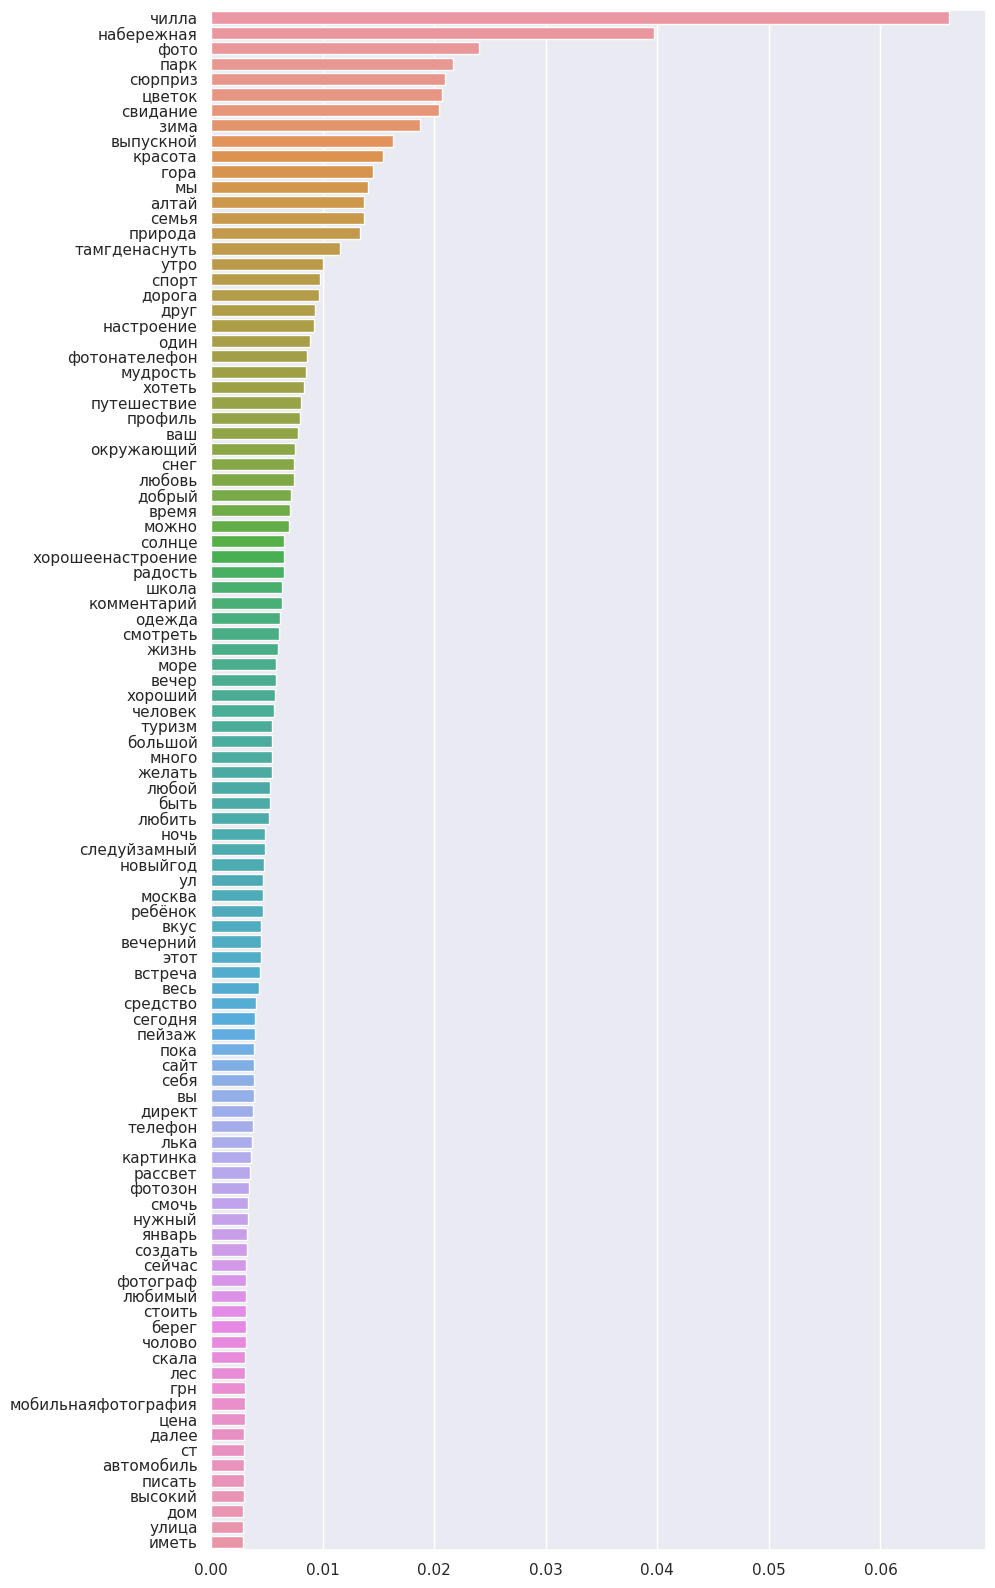

In [86]:
feature_importances = pd.Series(tree.feature_importances_, index=train_data.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[:100], y=feature_importances[:100].index)

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.25, random_state=12)

In [91]:
from xgboost import XGBClassifier
import numpy as np

xgb = XGBClassifier()
params = {'n_estimators': np.arange(100, 301, 50),
         'max_depth': np.arange(2, 5)}

xgb_grid = GridSearchCV(xgb, params, cv=5, scoring='precision', n_jobs=-1)
xgb_grid.fit(X_train[feature_importances[:59].index], y_train)
xgb_grid.best_params_

{'max_depth': 3, 'n_estimators': 250}

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_xgb = xgb_grid.best_estimator_
preds = best_xgb.predict(X_valid[feature_importances[:59].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.693135935397039
Precision:  0.6460807600950119
Recall:  0.7749287749287749
F1-score:  0.7046632124352331


In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params = {'n_estimators': np.arange(100, 301, 50),
        'max_depth': np.arange(20, 81, 10)}

rf_grid = GridSearchCV(rf, params, cv=5, scoring='precision', n_jobs=-1)
rf_grid.fit(X_train[feature_importances[:60].index], y_train)
rf_grid.best_params_

{'max_depth': 80, 'n_estimators': 100}

In [90]:
best_rf = rf_grid.best_estimator_
preds = best_rf.predict(X_valid[feature_importances[:60].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.6971736204576043
Precision:  0.6598984771573604
Recall:  0.7407407407407407
F1-score:  0.697986577181208


In [87]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

svc = SVC()
params = {'C': np.arange(0.5, 12.5, 0.5),
         'kernel': ['poly', 'rbf']}

svc_grid = GridSearchCV(svc, params, cv=5, scoring='precision', n_jobs=-1)
svc_grid.fit(X_train[feature_importances[:60].index], y_train)
svc_grid.best_params_

{'C': 10.5, 'kernel': 'rbf'}

In [88]:
best_svc = svc_grid.best_estimator_
preds = best_svc.predict(X_valid[feature_importances[:60].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.6796769851951547
Precision:  0.6445012787723785
Recall:  0.717948717948718
F1-score:  0.6792452830188679
